<a href="https://colab.research.google.com/github/VladimirAlkin/ParsedTelegramBot/blob/master/TweetsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

API_key = 'hJH6wvivGFVnbF6jls9pRTPQb'
API_key_secret = 'da3rrZQPZ2HEIyusBSOHZ00P75IpBRgJVO4tMbhabm51agZ2bX'
access_token = '1147592296600416256-Dz5vTP90ur97W8ff3Bh5mIM1s7ksmi'
secret_access_token = 'hxoub9sNnchgj5FCczTHlmFlNKw5eVkU5UXOvmzCdmfQ6'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAOXwNwEAAAAAsZQ6zg%2FyP%2FwmDpDLnI21ZchgoNk%3DWd7TqinZkwrxbHcluo6CoygLokDP7NP7RlzDLpjSlsfTOPxnKx'

consumerKey = API_key
consumerSecret = API_key_secret
accessToken = access_token
accessTokenSecret = secret_access_token

In [63]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

# Name of research target
# name = input("Enter the name of the tweeter account (without @) to research: ")

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name='BillGates', count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text)  # Removing @mentions
    text = re.sub('#', '', text)  # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text)  # Removing RT
    text = re.sub('https?:\/\/\S+', '', text)  # Removing hyperlink

    return text
# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,The best way to prevent new variants from emer...,0.377273,0.568182
1,It's encouraging to see innovation and clean e...,0.584848,0.401010
2,Here are five things you should know if you wa...,0.000000,0.000000
3,": 💡 From climateadaptation to genderequality, ...",0.000000,0.000000
4,The technological transformation we need to ad...,0.425000,0.425000
...,...,...,...
95,"To reduce duplication, focus the government’s ...",0.477273,0.318182
96,We need to revolutionize the world’s physical ...,0.372619,-0.186111
97,This the most important thing the U.S. can do ...,0.750000,0.450000
98,I’m inspired by Quarraisha Abdool Karim and . ...,0.500000,0.500000


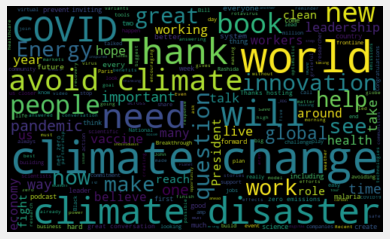

In [64]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [67]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,The best way to prevent new variants from emer...,0.377273,0.568182,Positive
1,It's encouraging to see innovation and clean e...,0.584848,0.401010,Positive
2,Here are five things you should know if you wa...,0.000000,0.000000,Neutral
3,": 💡 From climateadaptation to genderequality, ...",0.000000,0.000000,Neutral
4,The technological transformation we need to ad...,0.425000,0.425000,Positive
...,...,...,...,...
95,"To reduce duplication, focus the government’s ...",0.477273,0.318182,Positive
96,We need to revolutionize the world’s physical ...,0.372619,-0.186111,Negative
97,This the most important thing the U.S. can do ...,0.750000,0.450000,Positive
98,I’m inspired by Quarraisha Abdool Karim and . ...,0.500000,0.500000,Positive


In [68]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) The best way to prevent new variants from emerging is by stopping transmission of the virus altogether:  

2) It's encouraging to see innovation and clean energy investments at the forefront of 's AmericanJobsPlan. Building markets for new energy technologies is good for jobs today and will build the economies we need while avoiding a climate disaster. 

3) The technological transformation we need to address climate change can create good, safe jobs and build a more equitable, prosperous economy. To make that happen, we need to think big:  

4) I had a great time answering questions about my new book, climate change, and COVID-19 on  last week. Here’s a recap of the conversation. 

5) In this video, I answered some really good questions, including one about two really important numbers. Come ask me some questions of your own on  at 11:15:  

6) I named my book “How to Avoid a Climate Disaster,” not “How to Stop Climate Change,” because our climate is alrea

In [69]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

2) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

3) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

4) : Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…

5) Recent extreme weather events are a stark reminder that we’re already seeing the effects of climate change here at home and around the world. This type of observation system will help scientists monitor and predict future weather events. 

6) There are several ways individuals can help move us closer to a zero-car

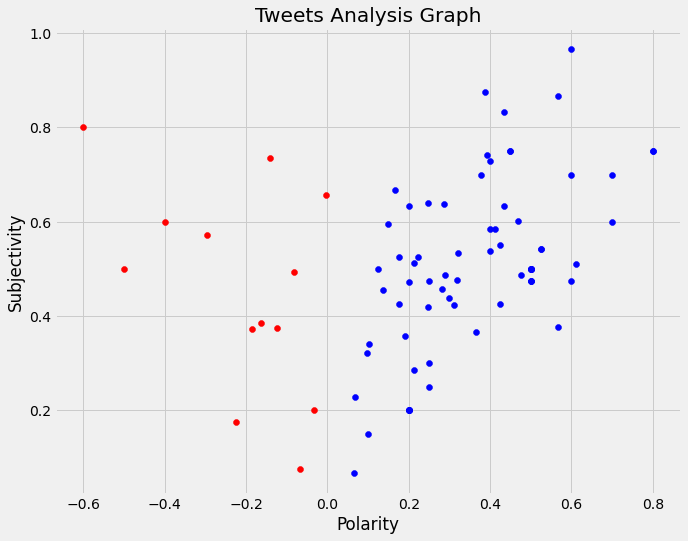

In [70]:
# Plotting 
plt.figure(figsize=(10,8)) 
for i in range(0, df.shape[0]):
  if( sortedDF['Analysis'][i] == 'Negative'):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Red') 
  if( sortedDF['Analysis'][i] == 'Positive'):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')
# plt.scatter(x,y,color)   
plt.title('Tweets Analysis Graph') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

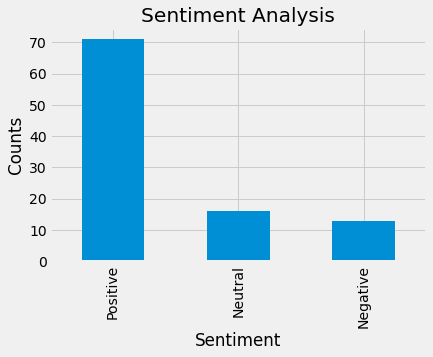

In [79]:
# The percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

# The percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


# Show the value counts
df['Analysis'].value_counts()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
